<a href="https://colab.research.google.com/github/mirchandani-mohnish/ClusterMetrics/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN




## Loading the Iris Dataset


In [83]:
iris = datasets.load_iris()
iris_dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()
# print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [85]:
df['target'] = iris.target
df['species'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa


<Figure size 1500x1500 with 0 Axes>

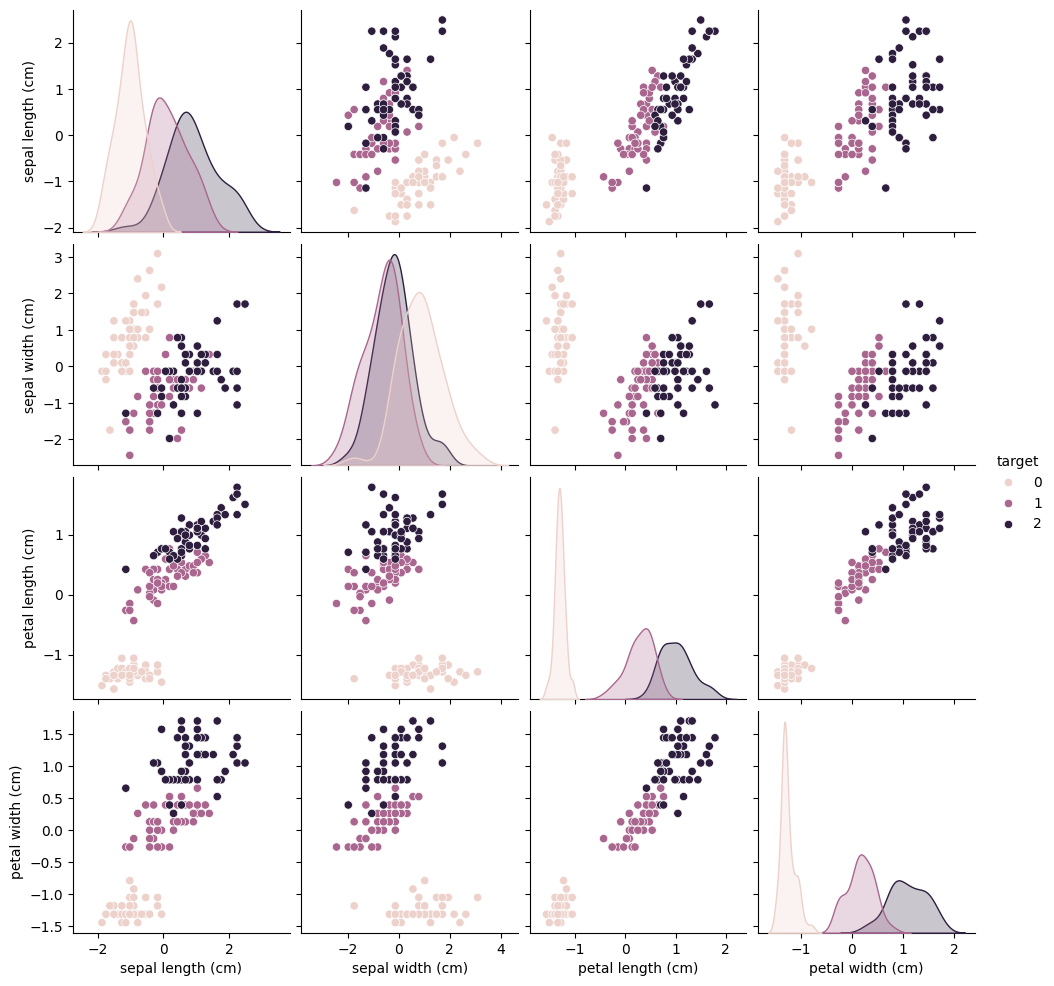

In [86]:

plt.figure(figsize=(15, 15))
sns.pairplot(df, hue='target')
plt.show()

In [88]:


dbscan_clustering = DBSCAN()
dbscan_clustering.fit(df.drop(['target', 'species'], axis=1))
dbscan_predictions = dbscan_clustering.labels_

print(dbscan_predictions)

df['dbscan_predictions'] = dbscan_predictions


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]


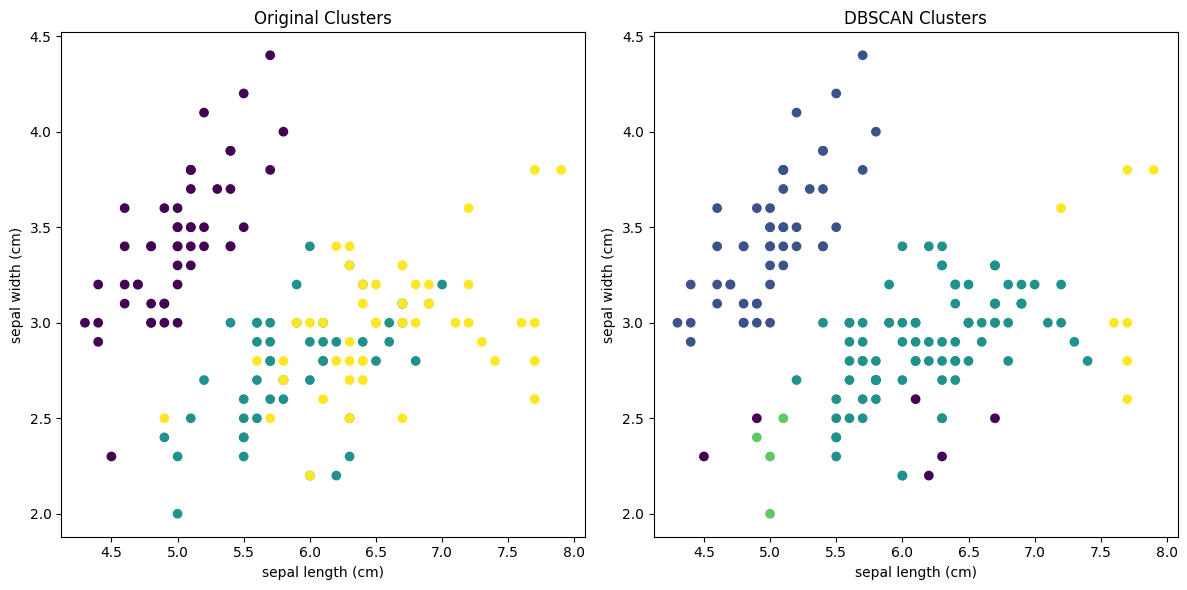

In [62]:
plt.figure(figsize=(12, 6))

# Plot original clusters
plt.subplot(1, 2, 1)
# plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(df.drop(['species'], axis=1).iloc[:, 0], df.drop(['species'], axis=1).iloc[:, 1], c=df['target'])

plt.title('Original Clusters')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
# plt.scatter(X[:, 0], X[:, 1], c=y_db, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(df.drop(['target', 'species'], axis=1).iloc[:, 0], df.drop(['target', 'species'], axis=1).iloc[:, 1], c=dbscan_predictions)
plt.title('DBSCAN Clusters')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

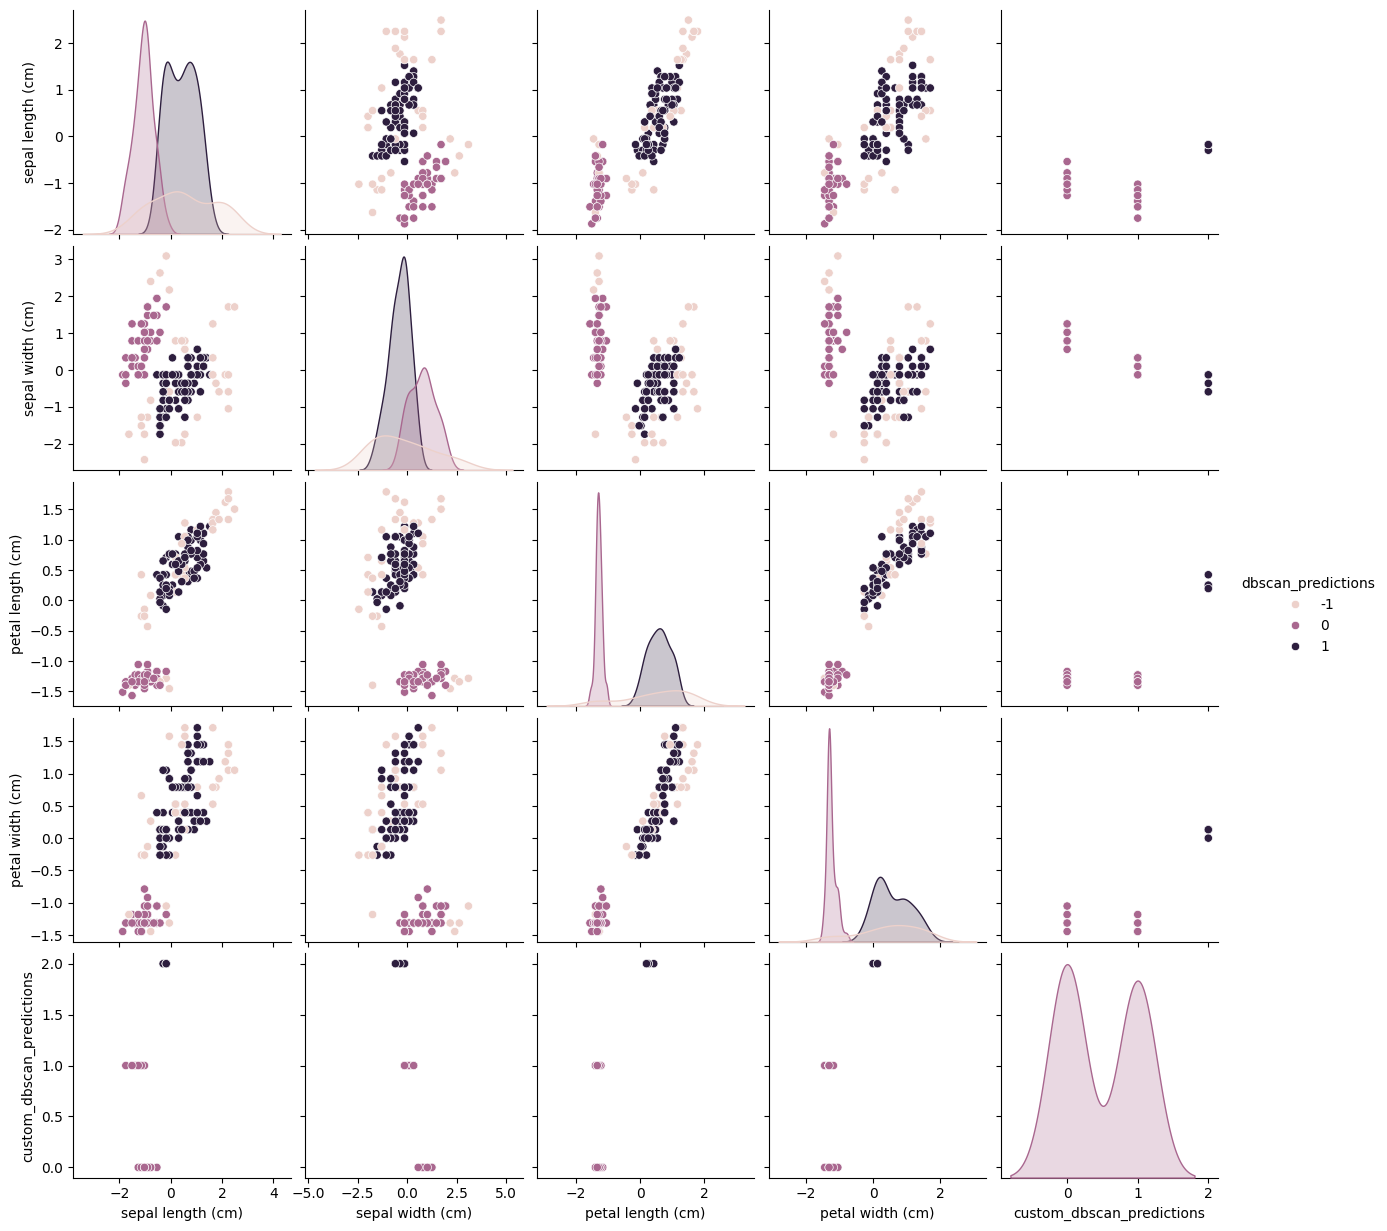

In [100]:
def generate_plot(df, hue):
  plt.figure(figsize=(15, 15))
  sns.pairplot(df, hue=hue)
  plt.show()

# plt.figure(figsize=(15, 15))
# sns.pairplot(df.drop(['dbscan_predictions'], axis=1), hue='target')
# plt.show()

generate_plot(df.drop(['species','target'], axis=1), 'dbscan_predictions')

In [94]:
import numpy as np
import heapq
from scipy.spatial.distance import euclidean

def dbscan_on_dataframe(df, eps, MinPts):
    # Extract the features (excluding the target)
    D = df.drop(['target', 'species', 'dbscan_predictions'], axis=1).values

    # Mark all points as unvisited
    n = len(D)
    visited = [False] * n
    clusters = []
    noise = []

    for i in range(n):
        if not visited[i]:
            visited[i] = True
            neighbors = region_query(D, i, eps)

            if len(neighbors) < MinPts:
                noise.append(i)
            else:
                cluster = []
                expand_cluster(D, i, neighbors, cluster, eps, MinPts, visited)
                clusters.append(cluster)

    return clusters, noise

def expand_cluster(D, P, neighbors, cluster, eps, MinPts, visited):
    cluster.append(P)
    i = 0
    while i < len(neighbors):
        Q = neighbors[i]
        if not visited[Q]:
            visited[Q] = True
            Q_neighbors = region_query(D, Q, eps)
            if len(Q_neighbors) >= MinPts:
                neighbors += Q_neighbors
        if Q not in cluster:
            cluster.append(Q)
        i += 1

def region_query(D, P, eps):
    neighbors = []
    for i in range(len(D)):
        if euclidean(D[P], D[i]) < eps:
            neighbors.append(i)
    return neighbors


In [96]:
clusters, noise = dbscan_on_dataframe(df, 0.3, 5) # with default values as in sklearn library



[[0, 4, 7, 17, 27, 28, 39, 40, 37, 11, 26, 49, 20], [1, 9, 12, 25, 30, 34, 45, 3, 29, 2, 47, 42], [96, 55, 88, 95, 99]]


<Figure size 1500x1500 with 0 Axes>

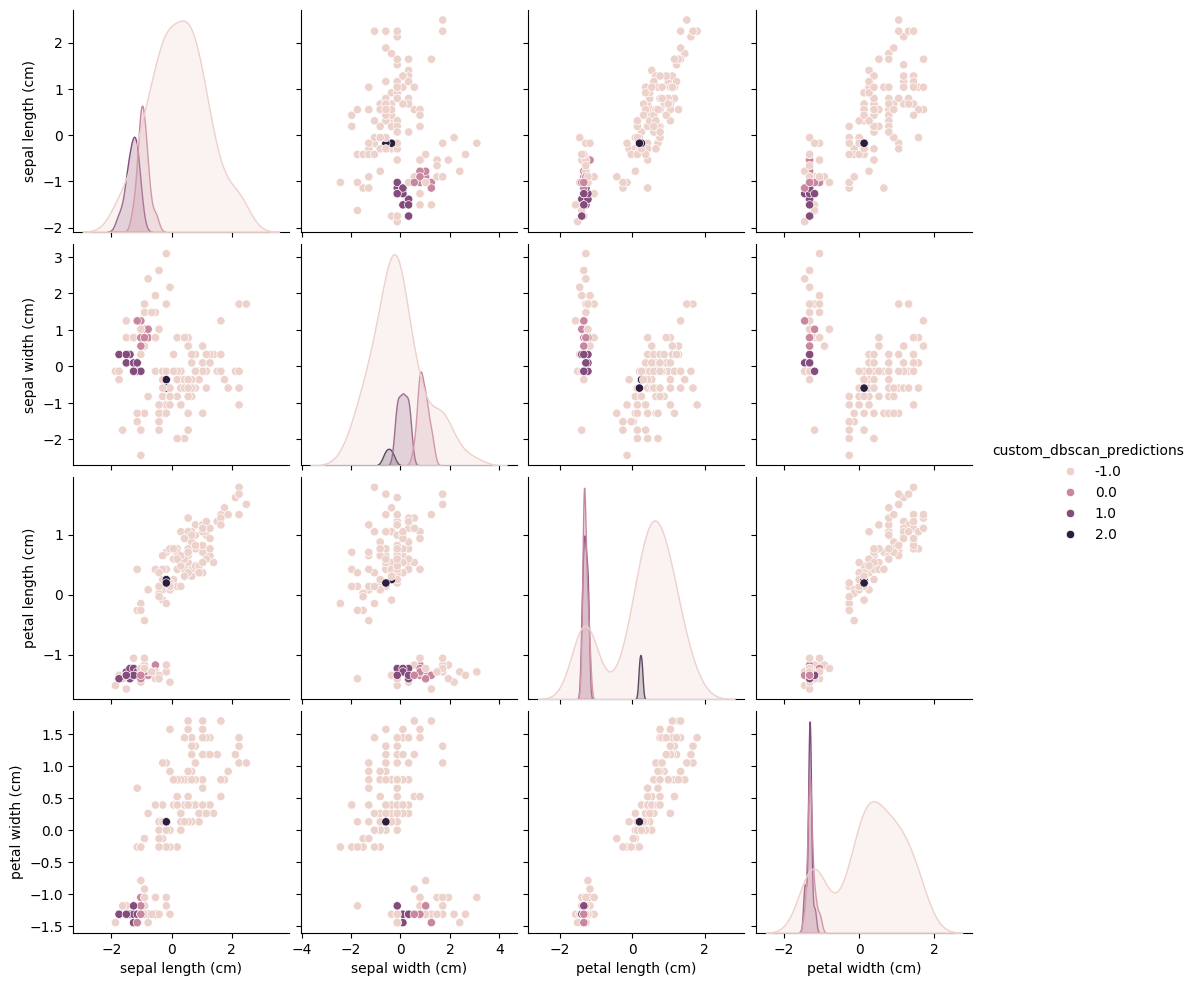

In [102]:
# code to generate cluster labels based on clusters provided

for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        df.loc[clusters[i][j], 'custom_dbscan_predictions'] = int(i)
for i in range(len(noise)):
    df.loc[noise[i], 'custom_dbscan_predictions'] = -1

df.head()
generate_plot(df.drop(['species', 'target', 'dbscan_predictions'], axis=1), 'custom_dbscan_predictions')



## OPTICS


In [67]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=min_samples, xi=0.05, min_cluster_size=0.05)
optics.fit(df.drop(['target', 'species'], axis=1))
optics_predictions = optics.labels_

print(optics_predictions)

df['optics_predictions'] = optics_predictions

[ 0  1 -1  1  0 -1 -1  0 -1  1 -1 -1  1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1  0  0  1  1 -1 -1 -1  1 -1 -1  0 -1  0  0 -1 -1 -1 -1  1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  2 -1 -1 -1  2  2
  2 -1 -1  2 -1  3 -1 -1 -1  4 -1 -1 -1  4 -1 -1 -1  3 -1 -1 -1  4  4 -1
 -1  3  4  3 -1 -1  3  3 -1 -1 -1  4 -1 -1 -1  4 -1 -1  3 -1 -1 -1  3 -1
 -1 -1 -1 -1 -1  3]


In [110]:

def optics_on_dataframe(df, eps, MinPts):
    # Extract the features (excluding the target)
    DB =  df.drop(['target', 'species', 'dbscan_predictions', 'custom_dbscan_predictions'], axis=1).values

    n = len(DB)
    processed = [False] * n
    reachability_distances = [np.inf] * n
    core_distances = [np.inf] * n
    ordered_list = []

    for i in range(n):
        if not processed[i]:
            processed[i] = True
            N = get_neighbors(DB, i, eps)
            ordered_list.append(i)
            core_distances[i] = core_distance(DB, i, eps, MinPts)

            if core_distances[i] != np.inf:
                seeds = []
                update(N, i, seeds, DB, eps, MinPts, core_distances, reachability_distances)
                while seeds:
                    q = heapq.heappop(seeds)[1]
                    if not processed[q]:
                        processed[q] = True
                        N_prime = get_neighbors(DB, q, eps)
                        ordered_list.append(q)
                        core_distances[q] = core_distance(DB, q, eps, MinPts)

                        if core_distances[q] != np.inf:
                            update(N_prime, q, seeds, DB, eps, MinPts, core_distances, reachability_distances)

    return ordered_list, reachability_distances

def get_neighbors(DB, p, eps):
    neighbors = []
    for i in range(len(DB)):
        if euclidean(DB[p], DB[i]) < eps:
            neighbors.append(i)
    return neighbors

def core_distance(DB, p, eps, MinPts):
    neighbors = get_neighbors(DB, p, eps)
    if len(neighbors) < MinPts:
        return np.inf
    distances = [euclidean(DB[p], DB[i]) for i in neighbors]
    distances.sort()
    return distances[MinPts - 1]

def update(N, p, seeds, DB, eps, MinPts, core_distances, reachability_distances):
    for q in N:
        if reachability_distances[q] == np.inf:
            new_reachability_distance = max(core_distances[p], np.linalg.norm(DB[p] - DB[q]))
            if new_reachability_distance < reachability_distances[q]:
                reachability_distances[q] = new_reachability_distance
                heapq.heappush(seeds, (new_reachability_distance, q))




In [112]:
ordered_list, reachability_distances = optics_on_dataframe(df, 0.3, 5)
print(ordered_list)
print(reachability_distances)

[0, 17, 27, 39, 40, 4, 28, 7, 11, 49, 37, 26, 20, 1, 12, 25, 45, 34, 9, 30, 3, 29, 2, 47, 42, 5, 6, 8, 10, 13, 14, 15, 16, 18, 19, 21, 22, 23, 24, 31, 32, 33, 35, 36, 38, 41, 43, 44, 46, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 99, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
[0.23710977266679079, 0.23710977266679073, 0.28389113479716893, 0.26013881683398843, 0.26013881683398826, inf, inf, 0.26627560369276515, inf, 0.2711974856725867, inf, 0.24891184063751798, 0.23710977266679073, inf, inf, inf, inf, 0.23710977266679079, inf, inf, 0.2963124182258155, inf, inf, inf, inf, 0.23710977266679073, 0.29533078689860875, 0.237109772666790

In [114]:
def extract_clusters_manual(ordered_list, reachability_distances, threshold):
    clusters = []
    current_cluster = []
    # cluster_assignments = []

    for i in range(len(ordered_list)):
        if reachability_distances[i] <= threshold:
            current_cluster.append(ordered_list[i])
        else:
            if current_cluster:
                clusters.append(current_cluster)
                current_cluster = []

    # Add the last cluster if it exists
    if current_cluster:
        clusters.append(current_cluster)

    return clusters

threshold = 0.5  # Adjust this threshold based on the reachability plot
clusters = extract_clusters_manual(ordered_list, reachability_distances, threshold)

for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        df.loc[clusters[i][j], 'custom_optics_predictions'] = int(i)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,dbscan_predictions,custom_dbscan_predictions,custom_optics_predictions
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa,0,0.0,0.0
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa,0,1.0,NaN
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa,0,1.0,NaN
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa,0,1.0,5.0
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa,0,0.0,NaN


<Figure size 1500x1500 with 0 Axes>

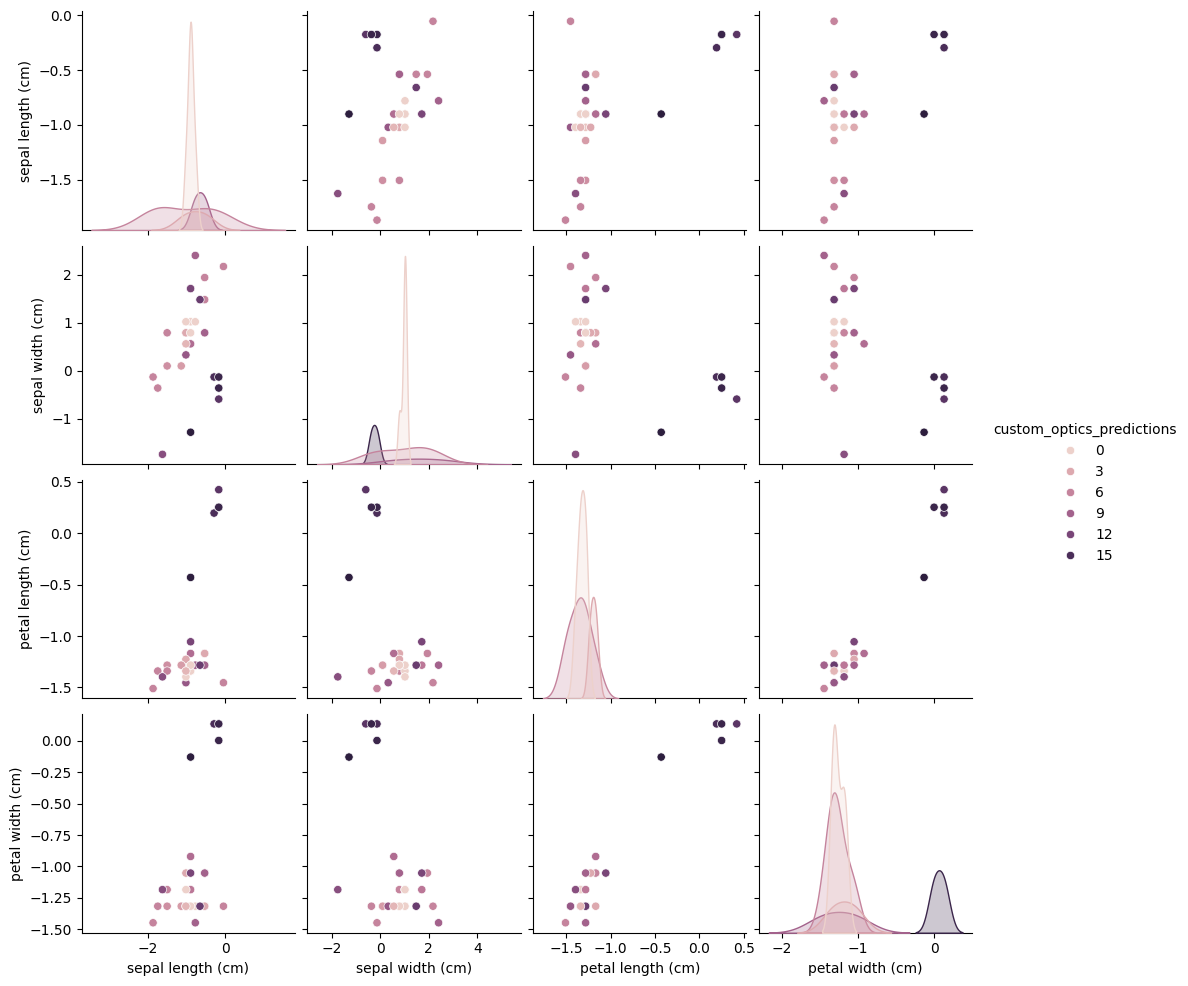

In [116]:

plt.figure(figsize=(15, 15))
sns.pairplot(df.drop(['target', 'species', 'dbscan_predictions', 'custom_dbscan_predictions'], axis=1),
             hue='custom_optics_predictions')
plt.show()